# 02 — Visualization

**Goal:** Explore and visualize the VIX and S&P 500 data.

**Includes:**
- VIX YTD line chart
- S&P 500 YTD chart
- Dual-axis overlay
- Returns distributions
- Rolling correlation

**References**:
- https://cdn.cboe.com/resources/indices/Volatility_Index_Methodology_Cboe_Volatility_Index.pdf


The VIX Index is a model-free measure of the market's expectation of future short term (30 days) volatility, derived from option prices on the S\&P 500.

The calculation takes as input the market prices of SPX options and SPXW options as well as U.S. Treasury yield curve rates.

$$
\sigma^2 = 
\frac{2}{T} 
\sum_i 
\frac{\Delta K_i}{K_i^2} e^{RT} Q(K_i)
- 
\frac{1}{T}
\left[
\frac{F}{K_0} - 1
\right]^2
$$

$$
\text{VIX Index} = \sigma \times 100
$$

**where**:

- $T$ — Time to expiration (in years
- $F$ — Option-implied forward price
- $K_0$ — First strike below or equal to the forward index level $F$
- $K_i$ — Strike of the $i^{th}$ out-of-the-money option
- $\Delta K_i = \dfrac{K_{i+1} - K_{i-1}}{2}$ — Interval between strike prices
- $Q(K_i)$ — Midpoint of bid-ask spread for each option with strike $K_i$
- $R$ — Risk-free interest rate to expiration

**Imports**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# --- Notebook display settings ---
plt.style.use("seaborn-v0_8-whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["axes.titlesize"] = 14
plt.rcParams["axes.labelsize"] = 12
plt.rcParams["lines.linewidth"] = 2
plt.rcParams["font.family"] = "DejaVu Sans"

import os
os.makedirs("../reports/figures", exist_ok=True)

In [3]:
# Read the CSVs saved in 01_data_collection (raw data)
vix_df = pd.read_csv("../data/raw/vix_ytd_ohlc.csv", parse_dates=["Date"])
spx_df = pd.read_csv("../data/raw/sp500_ytd_ohlcv.csv", parse_dates=["Date"])

# Sort (just to be safe)
vix_df = vix_df.sort_values("Date").reset_index(drop=True)
spx_df = spx_df.sort_values("Date").reset_index(drop=True)

# Preview
print("VIX:", vix_df.shape, "S&P500:", spx_df.shape)
vix_df.head(), spx_df.head()

VIX: (213, 5) S&P500: (213, 7)


(        Date   Open   High    Low  Close
 0 2025-01-02  17.21  19.50  16.96  17.93
 1 2025-01-03  17.66  17.94  16.11  16.13
 2 2025-01-06  16.77  16.87  15.71  16.04
 3 2025-01-07  16.48  18.90  15.79  17.82
 4 2025-01-08  17.91  19.50  17.37  17.70,
         Date     Open     High      Low    Close  Adj Close        Volume
 0 2025-01-02  5903.26  5935.09  5829.53  5868.55    5868.55  3.621680e+09
 1 2025-01-03  5891.07  5949.34  5888.66  5942.47    5942.47  3.667340e+09
 2 2025-01-06  5982.81  6021.04  5960.01  5975.38    5975.38  4.940120e+09
 3 2025-01-07  5993.26  6000.68  5890.68  5909.03    5909.03  4.517330e+09
 4 2025-01-08  5910.66  5927.89  5874.78  5918.25    5918.25  4.441740e+09)

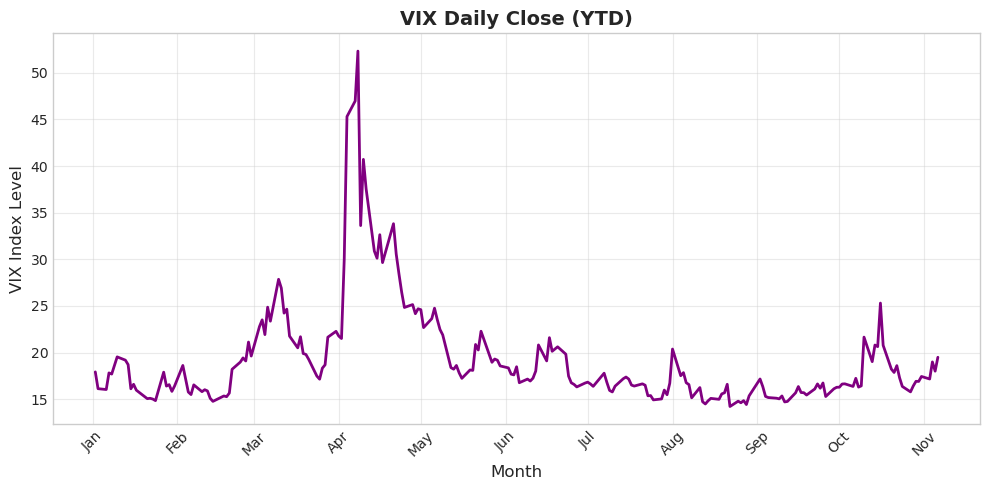

In [4]:
plt.figure(figsize=(10,5))
plt.plot(vix_df["Date"], vix_df["Close"], color="purple", linewidth=2)
plt.title("VIX Daily Close (YTD)", fontsize=14, weight="bold")
plt.xlabel("Month")
plt.ylabel("VIX Index Level")

# Month names on x-axis (force January start)
year = vix_df["Date"].min().year
ticks = pd.date_range(start=f"{year}-01-01", end=vix_df["Date"].max(), freq="MS")
plt.xticks(ticks=ticks, labels=ticks.strftime("%b"), rotation=45)

plt.grid(alpha=0.4)
plt.tight_layout()
# plt.savefig("../reports/figures/vix_ytd_close.png", dpi=300, bbox_inches="tight")
plt.show()

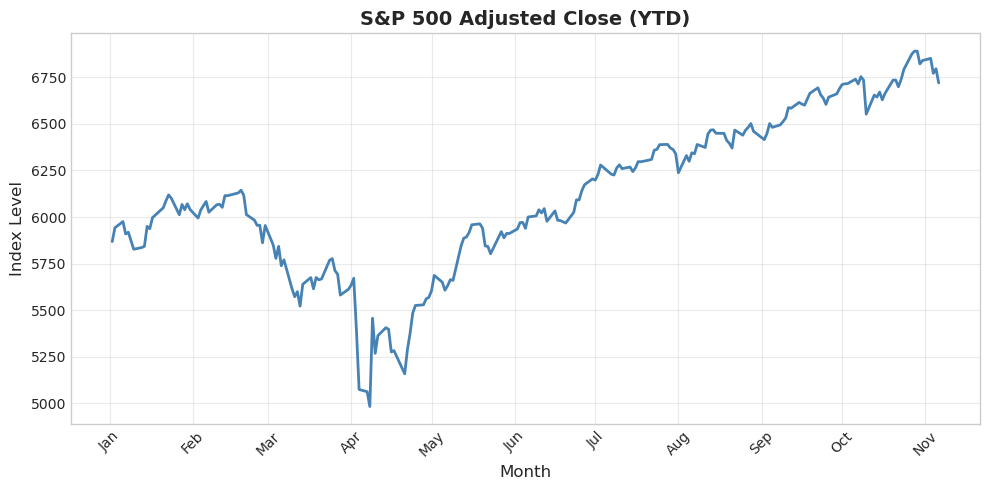

In [5]:
plt.figure(figsize=(10,5))
plt.plot(spx_df["Date"], spx_df["Adj Close"], color="steelblue", linewidth=2)
plt.title("S&P 500 Adjusted Close (YTD)", fontsize=14, weight="bold")
plt.xlabel("Month")
plt.ylabel("Index Level")

# Month names on x-axis (force January start)
year = spx_df["Date"].min().year
ticks = pd.date_range(start=f"{year}-01-01", end=spx_df["Date"].max(), freq="MS")
plt.xticks(ticks=ticks, labels=ticks.strftime("%b"), rotation=45)

plt.grid(alpha=0.4)
plt.tight_layout()
# plt.savefig("../reports/figures/sp500_ytd_close.png", dpi=300, bbox_inches="tight")
plt.show()

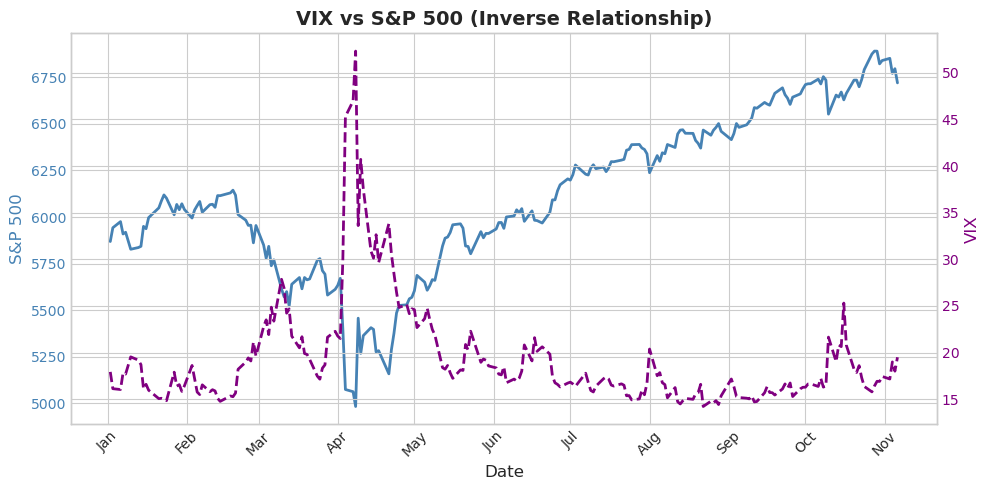

In [6]:
fig, ax1 = plt.subplots(figsize=(10,5))

ax1.plot(spx_df["Date"], spx_df["Adj Close"], color="steelblue", label="S&P 500 (Adj Close)")
ax1.set_xlabel("Date")
ax1.set_ylabel("S&P 500", color="steelblue")
ax1.tick_params(axis='y', labelcolor='steelblue')

ax2 = ax1.twinx()
ax2.plot(vix_df["Date"], vix_df["Close"], color="purple", linestyle="--", label="VIX")
ax2.set_ylabel("VIX", color="purple")
ax2.tick_params(axis='y', labelcolor='purple')

# Month names on x-axis (force January start)
year = vix_df["Date"].min().year
ticks = pd.date_range(start=f"{year}-01-01", end=vix_df["Date"].max(), freq="MS")
ax1.set_xticks(ticks)
ax1.set_xticklabels(ticks.strftime("%b"), rotation=45)

plt.title("VIX vs S&P 500 (Inverse Relationship)", fontsize=14, weight="bold")
fig.tight_layout()
# plt.savefig("../reports/figures/vix_spx_dual_axis.png", dpi=300, bbox_inches="tight")
plt.show()

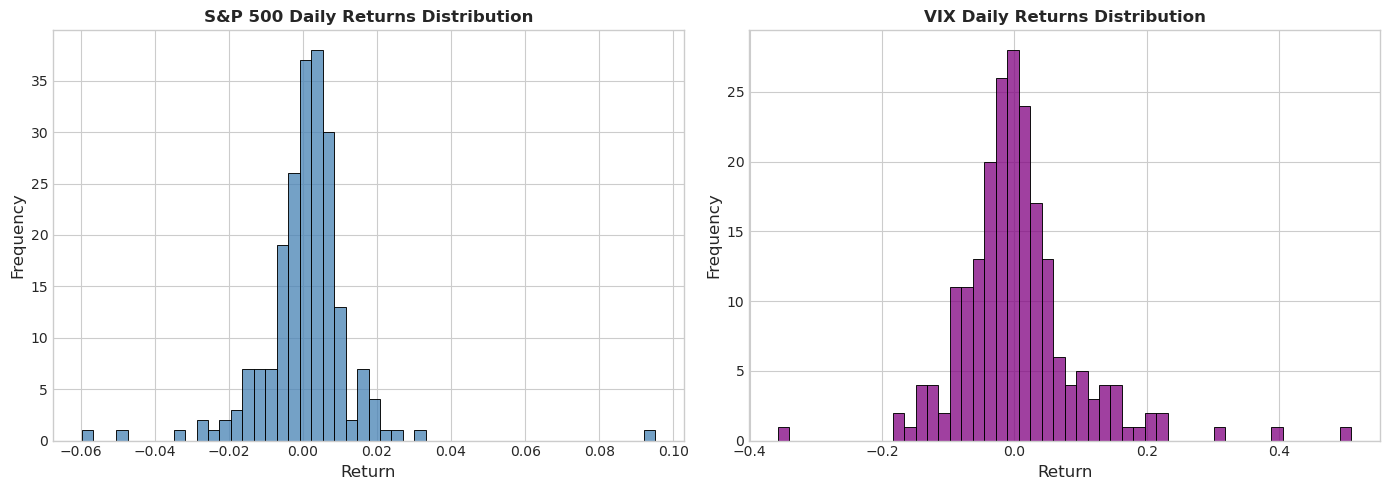

In [7]:
spx_df["Return"] = spx_df["Adj Close"].pct_change()
vix_df["Return"] = vix_df["Close"].pct_change()

fig, ax = plt.subplots(1, 2, figsize=(14,5))

sns.histplot(spx_df["Return"].dropna(), bins=50, color="steelblue", ax=ax[0])
ax[0].set_title("S&P 500 Daily Returns Distribution", fontsize=12, weight="bold")
ax[0].set_xlabel("Return")
ax[0].set_ylabel("Frequency")

sns.histplot(vix_df["Return"].dropna(), bins=50, color="purple", ax=ax[1])
ax[1].set_title("VIX Daily Returns Distribution", fontsize=12, weight="bold")
ax[1].set_xlabel("Return")
ax[1].set_ylabel("Frequency")

plt.tight_layout()
# plt.savefig("../reports/figures/return_distributions.png", dpi=300, bbox_inches="tight")
plt.show()

We can observe the skewness, kurtosis and normaility (moment mataching) visually. This can also be done more rigoorusly but is unnecessary for our analysis

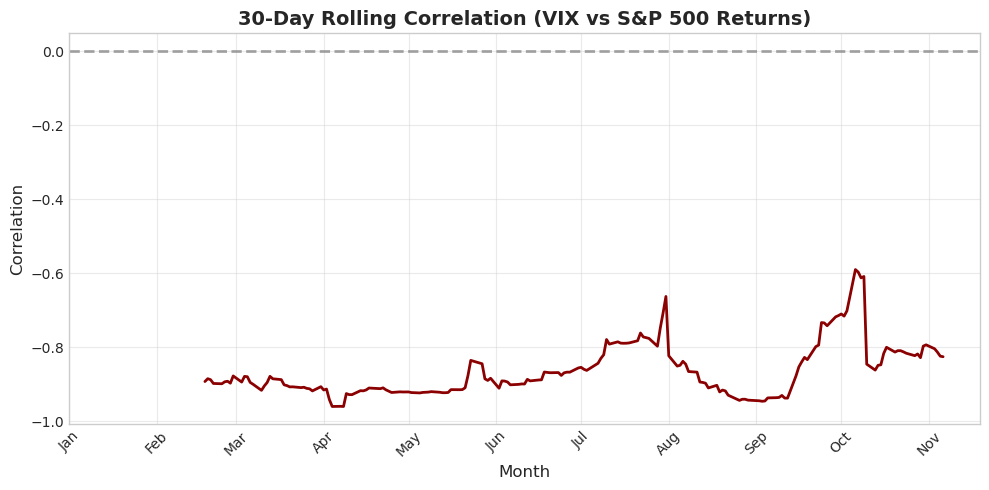

In [ ]:
merged = pd.merge(
    vix_df[["Date", "Return"]].rename(columns={"Return": "VIX_Return"}),
    spx_df[["Date", "Return"]].rename(columns={"Return": "SPX_Return"}),
    on="Date", how="inner"
)

merged["RollingCorr"] = merged["VIX_Return"].rolling(30).corr(merged["SPX_Return"])

plt.figure(figsize=(10,5))
plt.plot(merged["Date"], merged["RollingCorr"], color="darkred")
plt.title("30-Day Rolling Correlation (VIX vs S&P 500 Returns)", fontsize=14, weight="bold")
plt.xlabel("Month")
plt.ylabel("Correlation")

# Month names on x-axis (force January start)
year = merged["Date"].min().year
ticks = pd.date_range(start=f"{year}-01-01", end=merged["Date"].max(), freq="MS")
plt.xticks(ticks=ticks, labels=ticks.strftime("%b"), rotation=45)

plt.axhline(0, color="gray", linestyle="--", alpha=0.7)
plt.grid(alpha=0.4)
plt.tight_layout()
plt.savefig("../reports/figures/rolling_corr_vix.png", dpi=300, bbox_inches="tight")
plt.show()

Observe the strong negative correlation over the month-long rolling window.